### Step 1: Import the packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics \
    import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


### Step 2: Read the dataset using Pandas

In [4]:
data = pd.read_csv('car.csv')
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


### Step 3: Do the Basic EDA

In [5]:
# Check the shape of the data
data.shape

(301, 9)

In [6]:
# Check column names of the data
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [7]:
# Check for missing values
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [8]:
# Check for the datatypes and other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# Check the statistics of the data
data.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


In [10]:
# Let's see the correlation between the features
data.corr()

/var/folders/25/68x2r4f51_94sl5tyxbpx7rw0000gn/T/ipykernel_85602/1713588749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Present_Price,Kms_Driven,Owner,Selling_Price
Year,1.000000,-0.047584,-0.524342,-0.182104,0.236141
Present_Price,-0.047584,1.000000,0.203647,0.008057,0.878983
Kms_Driven,-0.524342,0.203647,1.000000,0.089216,0.029187
Owner,-0.182104,0.008057,0.089216,1.000000,-0.088344
Selling_Price,0.236141,0.878983,0.029187,-0.088344,1.000000


/var/folders/25/68x2r4f51_94sl5tyxbpx7rw0000gn/T/ipykernel_85602/327998381.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


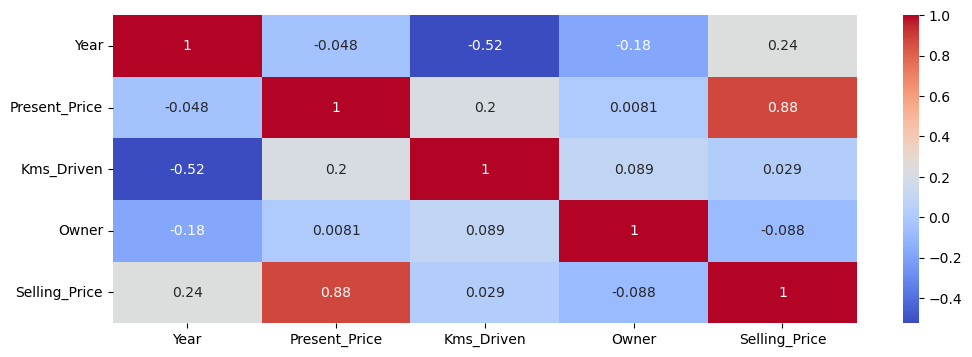

In [11]:
# Plot the heatmap
plt.figure(figsize=(12,4))
correlations = data.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

### Step 4: Do the basic preprocessing

In [12]:
# Let's encode the text features using Label Encoding
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,2,Dealer,1,0,3.35
1,sx4,2013,9.54,43000,1,Dealer,1,0,4.75
2,ciaz,2017,9.85,6900,2,Dealer,1,0,7.25
3,wagon r,2011,4.15,5200,2,Dealer,1,0,2.85
4,swift,2014,6.87,42450,1,Dealer,1,0,4.60


In [13]:
# Petrol=2, Diesel=1, CNG=0
data.Fuel_Type.unique()

array([2, 1, 0])

In [14]:
# Manual=1, Automatic=0
data.Transmission.unique()

array([1, 0])

In [15]:
# First=0, Second=1, Fourth=3
data.Owner.unique()

array([0, 1, 3])

In [16]:
# Target column is 'Selling_Price'
predict = 'Selling_Price'
data = data[['Year', 'Kms_Driven', 'Present_Price', 'Fuel_Type', 
            'Transmission', 'Owner', 'Selling_Price']]

In [17]:
# Split dataset into input (other than 'Selling_Price') and output ('Selling_Price')
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

/var/folders/25/68x2r4f51_94sl5tyxbpx7rw0000gn/T/ipykernel_85602/1767256145.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [18]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Step 5: Do the model building

In [19]:
# Train all models on x_train and y_train
lr_model = LinearRegression().fit(x_train, y_train)
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
rf_model = RandomForestRegressor().fit(x_train, y_train)
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)
lgbm_model = LGBMRegressor().fit(x_train, y_train)
xgb_model = XGBRegressor().fit(x_train, y_train)
catb_model = CatBoostRegressor().fit(x_train, y_train)

Learning rate set to 0.032678
0:	learn: 4.6279915	total: 53.7ms	remaining: 53.7s
1:	learn: 4.5605523	total: 54.3ms	remaining: 27.1s
2:	learn: 4.4882228	total: 54.7ms	remaining: 18.2s
3:	learn: 4.4176124	total: 55ms	remaining: 13.7s
4:	learn: 4.3367853	total: 55.4ms	remaining: 11s
5:	learn: 4.2682167	total: 55.8ms	remaining: 9.25s
6:	learn: 4.2068428	total: 56.2ms	remaining: 7.97s
7:	learn: 4.1353975	total: 56.6ms	remaining: 7.02s
8:	learn: 4.0552903	total: 56.9ms	remaining: 6.27s
9:	learn: 3.9778062	total: 57.3ms	remaining: 5.67s
10:	learn: 3.9118777	total: 57.7ms	remaining: 5.18s
11:	learn: 3.8653812	total: 58ms	remaining: 4.77s
12:	learn: 3.7995348	total: 58.3ms	remaining: 4.43s
13:	learn: 3.7226556	total: 58.7ms	remaining: 4.13s
14:	learn: 3.6550667	total: 59.1ms	remaining: 3.88s
15:	learn: 3.5995799	total: 59.4ms	remaining: 3.65s
16:	learn: 3.5423250	total: 59.8ms	remaining: 3.46s
17:	learn: 3.4781533	total: 60.1ms	remaining: 3.28s
18:	learn: 3.4153291	total: 60.4ms	remaining: 3.12

### Step 6: Evaluate models

In [20]:
# Define function to evaluate all these models
def evaluate_model(name, model, x_test, y_test):
    prediction = model.predict(x_test)
    metrics = {}
    metrics['Model Name'] = name
    metrics['Mean Absolute Error'] = mean_absolute_error(y_test, prediction)
    metrics['Mean Absolute Percentage Error'] = mean_absolute_percentage_error(y_test, prediction)
    metrics['Mean Squared Error'] = mean_squared_error(y_test, prediction)
    metrics['Root Mean Squared Error'] = np.sqrt(mean_squared_error(y_test, prediction))
    metrics['R2 Score'] = r2_score(y_test, prediction)
    return metrics


In [21]:
# Let's evaluate these models and see the results
pd.DataFrame([
    evaluate_model('LR Model', lr_model, x_test, y_test),
    evaluate_model('DT Model', dt_model, x_test, y_test),
    evaluate_model('RF Model', rf_model, x_test, y_test),
    evaluate_model('GBM Model', gbm_model, x_test, y_test),
    evaluate_model('LGBM Model', lgbm_model, x_test, y_test),
    evaluate_model('XGB Model', xgb_model, x_test, y_test),
    evaluate_model('CatBoost Model', catb_model, x_test, y_test)
])

,Model Name,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,LR Model,1.290509,0.891449,5.235097,2.288033,0.866402
1,DT Model,0.898525,0.176843,3.560051,1.886810,0.909149
2,RF Model,0.757720,0.154287,3.043996,1.744705,0.922318
3,GBM Model,0.722334,0.170729,2.399744,1.549111,0.938759
4,LGBM Model,0.911683,0.208547,4.337033,2.082554,0.889320
5,XGB Model,0.721777,0.168090,2.397411,1.548357,0.938819
6,CatBoost Model,0.751627,0.189759,3.439142,1.854492,0.912234


### Step 7: Prediction

In [22]:
# From the above results, as R2 is comparatively high in CatBoost Model
# so we will finalize this model. Also now let's do the prediction
# for x_test data
predictions = catb_model.predict(x_test)
predictions

array([ 2.10254094,  5.00412992,  4.12068112,  0.53775576,  4.39934761,
        5.48749336,  0.68788632, 10.32987867,  0.57114745,  4.94660601,
        2.45142749,  0.34111349,  1.55388219,  0.4493425 , 20.38136903,
        4.3499811 ,  0.67188088,  5.40877486,  3.77091046,  3.67005062,
        3.45018177,  0.61072455,  3.32551502, 20.11280921, 21.75087335,
        5.48378903,  6.40551642,  5.6238456 ,  0.78157935,  0.92050327,
        0.63738548,  0.77622953,  7.45032185,  4.14809004,  4.1918031 ,
        0.31630211,  3.33928023,  0.81867155,  0.57014611,  4.03782911,
       10.9253294 , 14.71949459,  6.02200316,  6.5274141 ,  0.58447084,
        0.46201527,  0.53449872,  5.06529852,  0.48804029,  7.73889046,
       10.83959458,  0.23364771,  9.64030164,  0.55950329,  6.65730616,
        1.13781568,  0.34183263,  9.09657231, 20.42191178,  7.5857917 ,
        8.70769443])

In [23]:
# Let's do the prediction with new unknown data
input = [[2016, 30000, 6.87, 1, 1, 0, 0]]
price = catb_model.predict(input)
print(price.round(1)[0], 'in Lakhs')

5.6 in Lakhs


### Step 8: Save Model

In [24]:
# Save the model in pickle file
import pickle
pickle.dump(catb_model, open('car_price_predictor_model.pkl', 'wb'))